# LFD Homework 4

Fourth week homework for the "Learning from Data" course offerd by [Caltech on edX](https://courses.edx.org/courses/course-v1:CaltechX+CS1156x+3T2017). Note that this notebook does not contain *all* solutions; it showcases solutions to those problems that require programming / simulation (and omits pen and paper problems).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spec

%matplotlib notebook

## Generalization Error (P1 - P3)

For $N > d_{VC}$ we use the simple approximate bound $N^{d_{VC}}$ for the growth function $m_{\mathcal{H}}(N)$ as stated in the problem description.

### P1

Given a hypothesis set $\mathcal{H}$ with $d_{VC}(\mathcal{H}) = 10$, we are interested in a numerical approximation of the sample size $N$ with a generalization error $|E_{\mathrm{out}} - E_{\mathrm{in}}| \leq 0.05$ at 95% confidence ($\delta = .05$). The generalization bound derived from the VC inequality is

$$
\left|E_{\mathrm{out}} - E_{\mathrm{in}}\right| \leq \Omega(N, \mathcal{H}, \delta) = \sqrt{\frac{8}{N} \log{\left(\frac{4m_{\mathcal{H}}(2N)}{\delta}\right)}} 
$$

thereby the bound $\Omega$ is approximated for $N > d_{VC}$ as specified above through

$$
\Omega(N, \mathcal{H}, \delta) \leq \sqrt{\frac{8}{N} \log{\left(\frac{4\sum_{i=0}^{d_{VC}}{2n \choose i}}{\delta}\right)}} \sim \sqrt{\frac{8}{N} \log{\left(\frac{4(2N)^{d_{VC}}}{\delta}\right)}}
$$

Now, in order to find the minimum number of samples required $N_\min$, we need to solve the following inequality for $N$:

$$
\sqrt{\frac{8}{N} \log{\left(\frac{4(2N)^{d_{VC}}}{\delta}\right)}} \leq \mathrm{err} = 0.05 
$$

Obtaining the solution is not entirely straight forward, with the main problem being that both $N$ and $\log(N)$ occur in the term which requires using the [*Lambert W Function*](https://en.wikipedia.org/wiki/Lambert_W_function) which in turn is not guaranteed to have a solution in the real numbers. In our case, however, there exist two solutions in the real numbers as we will see. The first step is to isolate the terms containing $N$ on the right hand side

$$
\begin{array}{rccl}
 & \sqrt{\frac{8}{N} \log{\left(\frac{4(2N)^{d_{VC}}}{\delta}\right)}} & \leq & \mathrm{err}\\
 \Leftrightarrow & \frac{8}{N} \log{\left(\frac{2^{d_{VC} + 2} N^{d_{VC}}}{\delta}\right)} & \leq & \mathrm{err}^2 \\
 \Leftrightarrow & \frac{8}{\mathrm{err}^2} \left(\log{\left(\frac{2^{d_{VC} + 2}}{\delta}\right)} + d_{VC} \log{\left(N\right)}\right) & \leq & N \\
 \Leftrightarrow & \frac{8}{\mathrm{err}^2} \log{\left(\frac{2^{d_{VC} + 2}}{\delta}\right)} & \leq & N - \frac{8 d_{VC}}{\mathrm{err}^2} \log{\left(N\right)}
\end{array}
$$

Now we abbreviate the notation by setting two constants $b = - \frac{8 d_{VC}}{\mathrm{err}^2}$ and $c = \frac{8}{\mathrm{err}^2} \log{\left(\frac{2^{d_{VC} + 2}}{\delta}\right)}$. This enables us to rewrite the inequality as

$$
\begin{array}{rccl}
 & c & \leq & N + b \log{(N)}\\
 \Leftrightarrow & c & \leq & N + b \left(\log{\left(\frac{1}{b} N\right)} - \log{\left(\frac{1}{b} \right)}\right) \\
 \Leftrightarrow & \frac{c}{b} + \log{\left(\frac{1}{b} \right)} & \leq & \frac{1}{b} N + \log{\left(\frac{1}{b} N\right)} \\
 \Leftrightarrow & \mathrm{e}^{\frac{c}{b}} \frac{1}{b} & \leq & \mathrm{e}^{\frac{1}{b} N} \frac{1}{b} N \\
 \Leftrightarrow & W(\mathrm{e}^{\frac{c}{b}} \frac{1}{b}) & \leq & \frac{1}{b} N \\
 \Leftrightarrow & bW(\mathrm{e}^{\frac{c}{b}} \frac{1}{b}) & \leq & N 
\end{array}
$$

where $W$ is the *Lambert Function*. We can further rearrange the exponent to $\mathrm{e}^{\frac{c}{b}} \frac{1}{b} = - \frac{\mathrm{err}^2}{8 d_{VC}} \left(\frac{\delta}{2^{d_{VC} + 2}}\right)^{\frac{1}{d_{VC}}} = z$ and obtain the inequality

$$
b W(z) = - \frac{8 d_{VC}}{\mathrm{err}^2} W\left(- \frac{\mathrm{err}^2}{8 d_{VC}} \left(\frac{\delta}{2^{d_{VC} + 2}}\right)^{\frac{1}{d_{VC}}}\right) \leq N
$$

Inspecting $z$, we can see that for the values defined above for $d_{vc}$, $\delta$ and $\mathrm{err}$ this term lies in the interval $-\frac{1}{\mathrm{e}}< z < 0$. Therefore there are two real valued solutions to the inequality and we choose their maximum (which is conceptually more plausible), i.e., the value solving the $k = -1$ branch of the lambert function (c.f., scipy documentation [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.lambertw.html)). Hence our $N_\min$ can be computed as:

In [2]:
delta = .05
d_vc = 10.
err = .05

b = - 8. / err**2 * d_vc
z = (delta / 2**(d_vc + 2))**(1./d_vc) / b
N_min = int(np.ceil((spec.lambertw(z,-1) * b).real))

print('-1/e < z < 0: {}'.format(-np.exp(-1) < z < 0))
print('\n-->    N >= {}'.format(N_min))

-1/e < z < 0: True

-->    N >= 452957


### P2 + P3

In this problem we want to plot several different bounds on the generalization error $\epsilon$ all holding with a probability of at least $1 - \delta$. For each bound we set $d_{VC} = 50$, $\delta = .05$ and plot the bound as a function of $N$. The bound functions to plot are

 1. Original VC bound: $\epsilon \leq \sqrt{\frac{8}{N} \log{\left(\frac{4 m_{\mathcal{H}}(2N)}{\delta}\right)}} \sim \sqrt{\frac{8}{N} \log{\left(\frac{2^{d_{VC} + 2} N^{d_{VC}}}{\delta}\right)}}$
 1. Rademacher Penalty bound: $\epsilon \leq \sqrt{\frac{2 \log{\left(2N m_{\mathcal{H}}(N)\right)}}{N}} + \sqrt{\frac{2}{N}\log{\left(\frac{1}{\delta}\right)}} + \frac{1}{N} \sim \sqrt{\frac{2 \log{\left(2N^{d_{VC} + 1}\right)}}{N}} + \sqrt{\frac{2}{N}\log{\left(\frac{1}{\delta}\right)}} + \frac{1}{N}$
 1. Parrondo and Van den Broek bound: $\epsilon \leq \sqrt{\frac{1}{N} \left(2\epsilon + \log{\left(\frac{6 m_{\mathcal{H}}(2N)}{\delta}\right)}\right)} \sim \sqrt{\frac{1}{N} \left(2\epsilon + \log{\left(\frac{6~ 2^{d_{VC}} N^{d_{VC}}}{\delta}\right)}\right)}$
 1. Devroye bound: $\epsilon \leq \sqrt{\frac{1}{2N} \left(4\epsilon(1 + \epsilon) + \log{\left(\frac{4 m_{\mathcal{H}}(N^2)}{\delta}\right)}\right)} \sim \sqrt{\frac{1}{2N} \left(4\epsilon(1 + \epsilon) + \log{\left(\frac{4~ N^{2 d_{VC}}}{\delta}\right)}\right)}$
 
The implementations for these functions are given below. Note that we have to pull out the exponents for some of the log functions for numerical stability, e.g., computing $N^{d_{VC}}$ for $N = 10^5$ and $d_{VC} = 50$ could easily cause an overflow.

In [3]:
def vc_bound(N, d_vc=50., delta=.05):
    ''' Original VC bound.'''
    
    return np.sqrt(8./N * ((d_vc + 2.) * np.log(2.) + d_vc * np.log(N) - np.log(delta)))


def rademacher_bound(N, d_vc=50., delta=.05):
    ''' Rademacher penalty bound.'''
    
    return np.sqrt((2. * (np.log(2.) + (d_vc + 1.) * np.log(N)))/N) + np.sqrt(-2./N * np.log(delta)) + 1./N

Note that the Parrondo / Van den Broek and the Devroye bounds are implicit bounds in $\epsilon$. Concretely, we have to initialize the $\epsilon$ on their right hand sides to a sensible value, compute a new bound and repeat the process using this new bound (until convergence). Here we will use the original VC bound as initialization.

In [4]:
def init_epsilon(func):
    ''' Function decorator to initialize the epsilon parameter to the original VC bound.'''
    
    def fwrap(*args, **kwargs):
        if 'epsilon' in kwargs:
            return func(*args, **kwargs)
        else:
            return func(*args, epsilon=vc_bound(args[0]), **kwargs)
    
    return fwrap


@init_epsilon
def parrondo_van_den_broek_bound(N, epsilon=1., d_vc=50., delta=.05):
    ''' Initialized Parrondo and Van den Broek bound (implicit form, iterative implementation).'''
    
    epsilon_prime = np.finfo(float).max
    while (np.abs(epsilon_prime - epsilon) > 1e-7).any():
        epsilon_prime = epsilon
        epsilon = np.sqrt(1./N * (2 * epsilon + np.log(6) + d_vc * np.log(2) + d_vc * np.log(N) - np.log(delta)))
    
    return epsilon


@init_epsilon
def devroye_bound(N, epsilon=1., d_vc=50., delta=.05):
    ''' Initialized Devroye bound (implicit form, iterative implementation).'''
    
    epsilon_prime = np.finfo(float).max
    while (np.abs(epsilon_prime - epsilon) > 1e-7).any():
        epsilon_prime = epsilon
        epsilon = np.sqrt(1./(2. * N) * (4 * epsilon * (1 + epsilon) + np.log(4) + 2 * d_vc * np.log(N) - np.log(delta)))
    
    return epsilon

Now we are ready to plot the bounds against each other:

<IPython.core.display.Javascript object>


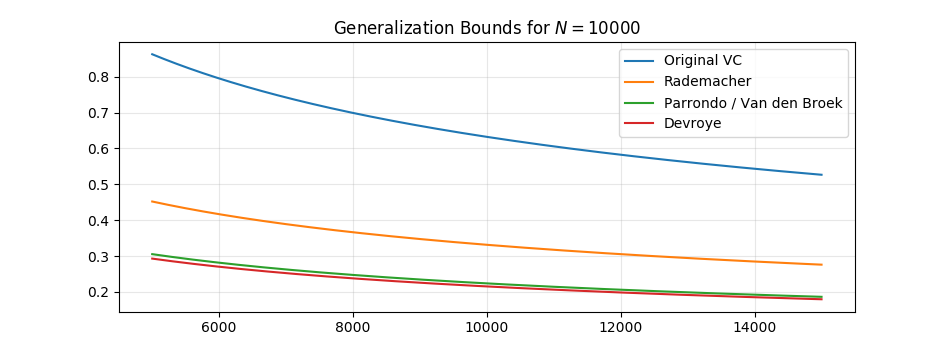

In [5]:
plt.figure(figsize = (9.5, 3.5))
N = np.arange(5000., 15000.)

plt.title('Generalization Bounds for $N = 10000$')

plt.plot(N, vc_bound(N), label='Original VC')
plt.plot(N, rademacher_bound(N), label='Rademacher')
plt.plot(N, parrondo_van_den_broek_bound(N), label='Parrondo / Van den Broek')
plt.plot(N, devroye_bound(N), label='Devroye')

plt.grid(alpha=.3)
plt.legend()

And similarly, we can plot the bounds for very small values for $N$:

<IPython.core.display.Javascript object>


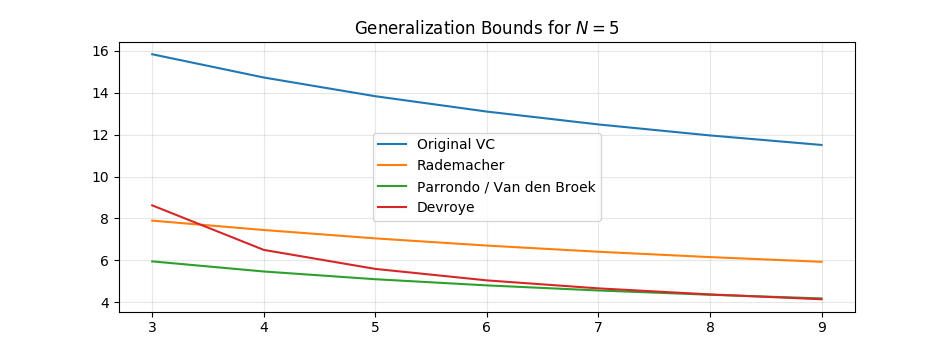

In [6]:
plt.figure(figsize = (9.5, 3.5))
N = np.arange(3., 10)

plt.title('Generalization Bounds for $N = 5$')

plt.plot(N, vc_bound(N), label='Original VC')
plt.plot(N, rademacher_bound(N), label='Rademacher')
plt.plot(N, parrondo_van_den_broek_bound(N), label='Parrondo / Van den Broek')
plt.plot(N, devroye_bound(N), label='Devroye')

plt.grid(alpha=.3)
plt.legend()

And just for the fun of it we'll check the solution obtained for P1 against the VC bound implementation (after all it took all my Sunnday afternoon). If this returns something close to $0.05$ it should be correct:

In [7]:
vc_bound(N_min, d_vc=10.)

0.049999993061150577

## Bias and Varianc (P4 - P7)

Given the target function $f: [-1, 1] \mapsto \mathbb{R}, ~f(x) = \sin(\pi x)$ with a uniform probability distribution over the input space, we want to analyze hypotheses derived from training sets of size $N = 2$. Thereby the error measure is the mean squared error.

### P4

Let the set of hypotheses $\mathcal{H}$ be all hypotheses of the form $h(x) = ax$. What is the expected value $\bar{g}(x)$ with respect to data sets $\mathcal{D}$ of hypotheses produced by the learning algorithm?

We answer this question by simulation. First, using the least squares method, we derive the learning rule for hypothesis' of the type $h(x) = ax$. Using the mean squared error measure, the cost function for such a hypothesis is defined as $J(a) = \frac{1}{N}\sum_{i = 1}^{N}{\left(ax_i - y_i\right)^2}$. Now, we can set $\frac{d}{da}J(a) = 0$ to obtain the learning rule using the least squares method. For the two dimensional case using $N = 2$ examples this simplifies to

$$
a = \frac{x_1y_1 + x_2y_2}{x_1^2 + x_2^2}
$$

for any data set $\mathcal{D} = \{(x_1, y_1), (x_2, y_2)\}$. Now in order to approximate $\mathbb{E}_\mathcal{D}\left[g^{(\mathcal{D})}(x)\right] = \bar{g}(x)$, we use the unbiased estimator

$$
\bar{g}(x) \approx \frac{1}{K} \sum_{k = 1}^{K}{g^{(\mathcal{D})}(x)} = \left(\frac{1}{K} \sum_{k = 1}^{K}a_k\right)x = \hat{a}x 
$$

for data sets $\mathcal{D}_1, \ldots, \mathcal{D}_K$. For large $K$, this estimator approaches $\bar{g}(x)$. Here we will approach it with $K = 10^4$:

In [8]:
K = 1e4
f = lambda x: np.sin(np.pi * x)
X = np.random.uniform(-1.,1.,(int(K), 2))
Y = f(X)

A = np.sum(X * Y / np.sum(X**2, axis=1, keepdims=True), axis=1, keepdims=True) 
a_hat = np.mean(A)

print('a_hat = {:.2f}'.format(a_hat))

a_hat = 1.43


### P 5

What is the value of the bias (approx.)?

The bias term is defined as $\mathrm{bias} = \mathbb{E}_x\left[\left(\bar{g}(x) - f(x)\right)^2\right]$. Now using the estimator for $\bar{g}(x)$ derived above, we can approximate (Monte Carlo) this by computing the mean squared difference between $\bar{g}(x)$ and $f(x)$ as:

In [9]:
g_bar = lambda x: a_hat * x
bias = np.mean((g_bar(X) - f(X))**2)

print('bias = {:.1f}'.format(bias))

bias = 0.3


### P6

What is the value of the variance (approx.)?

The variance term is defined as $\mathrm{variance} = \mathbb{E}_x\left[\mathbb{E}_\mathcal{D}\left[\left(g(x) - \bar{g}(x)\right)^2\right]\right]$. Again, using a Monte Carlo approximation this can be computed as:

In [10]:
X_prime = np.random.uniform(-1.,1.,(int(K), 2))
variance = np.mean((A*X_prime - g_bar(X_prime))**2)

print('variance = {:.1f}'.format(variance))

variance = 0.2


### P7

Now let's compute the expected out of sample error for several models and identify the one with the least expected value:

<IPython.core.display.Javascript object>


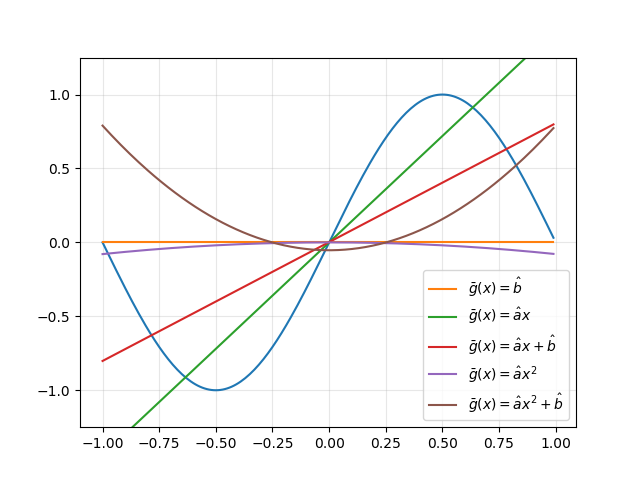

In [11]:
K = 1e4
X = np.random.uniform(-1.,1.,(int(K), 2))
Y = f(X)

def expected_E_out(g, g_bar, X=X, f=f, K=K):
    
    bias = np.mean((g_bar(X) - f(X))**2)
    X_prime = np.random.uniform(-1.,1.,(int(K), 2))
    variance = np.mean((g(X_prime) - g_bar(X_prime))**2)
    
    return bias + variance

p = np.arange(-1.,1.,.01)
plt.figure()
plt.plot(p, f(p))

The model $h(x) = b$ has the following expected value for $E_{\mathrm{out}}$:

In [12]:
# h(x) = b
b = np.sum(Y, axis=1, keepdims=True) / 2.
b_hat = np.mean(b)
E_out = expected_E_out(lambda x: b, lambda x: b_hat)

print('E_D[E_out(h(x) = b)]\t= {:.3f}'.format(E_out))
plt.plot(p, np.ones_like(p) * b_hat, label='$\\bar{g}(x) = \\hat{b}$');

E_D[E_out(h(x) = b)]	= 0.751


The model $h(x) = ax$ has the following expected value for $E_{\mathrm{out}}$:

In [13]:
# h(x) = ax
a = np.sum(X * Y / np.sum(X**2, axis=1, keepdims=True), axis=1, keepdims=True)
a_hat = np.mean(a)
E_out = expected_E_out(lambda x: a * x, lambda x: a_hat * x)

print('E_D[E_out(h(x) = ax)]\t= {:.3f}'.format(E_out))
plt.plot(p, a_hat * p, label='$\\bar{g}(x) = \\hat{a}x$');

E_D[E_out(h(x) = ax)]	= 0.509


The model $h(x) = ax + b$ has the following expected value for $E_{\mathrm{out}}$:

In [14]:
# h(x) = ax + b
x_bar = np.mean(X, axis=1, keepdims=True)
y_bar = np.mean(Y, axis=1, keepdims=True)
a = np.sum((X - x_bar)*(Y - y_bar), axis=1, keepdims=True)/np.sum((X - x_bar)**2, axis=1, keepdims=True)
b = y_bar - a * x_bar
a_hat = np.mean(a)
b_hat = np.mean(b)
E_out = expected_E_out(lambda x: a * x + b, lambda x: a_hat * x + b_hat)

print('E_D[E_out(h(x) = ax + b)]\t= {:.3f}'.format(E_out))
plt.plot(p, a_hat * p + b_hat, label='$\\bar{g}(x) = \\hat{a}x + \\hat{b}$');

E_D[E_out(h(x) = ax + b)]	= 1.872


The model $h(x) = ax^2$ is obtained as a transformation of $h(x) = ax$ and has the following expected value for $E_{\mathrm{out}}$:

In [15]:
# h(x) = ax^2
phi = lambda x: x**2
a = np.sum(phi(X) * Y / np.sum(phi(X)**2, axis=1, keepdims=True), axis=1, keepdims=True)
a_hat = np.mean(a)
E_out = expected_E_out(lambda x: a * phi(x), lambda x: a_hat * phi(x))

print('E_D[E_out(h(x) = ax^2)]\t= {:.3f}'.format(E_out))
plt.plot(p, a_hat * phi(p), label='$\\bar{g}(x) = \\hat{a}x^2$');

E_D[E_out(h(x) = ax^2)]	= 9.480


The model $h(x) = ax^2 + b$ is obtained as a transformation of $h(x) = ax + b$ and has the following expected value for $E_{\mathrm{out}}$:

In [16]:
# h(x) = ax^2 + b
x_bar = np.mean(phi(X), axis=1, keepdims=True)
y_bar = np.mean(Y, axis=1, keepdims=True)
a = np.sum((phi(X) - x_bar)*(Y - y_bar), axis=1, keepdims=True)/np.sum((phi(X) - x_bar)**2, axis=1, keepdims=True)
b = y_bar - a * x_bar
a_hat = np.mean(a)
b_hat = np.mean(b)
E_out = expected_E_out(lambda x: a * phi(x) + b, lambda x: a_hat * phi(x) + b_hat)

print('E_D[E_out(h(x) = ax^2 + b)]\t= {:.3f}'.format(E_out))
plt.plot(p, a_hat * phi(p) + b_hat, label='$\\bar{g}(x) = \\hat{a}x^2 + \\hat{b}$');

E_D[E_out(h(x) = ax^2 + b)]	= 1111.248


In [18]:
plt.gca().set_ylim([-1.25,1.25])
plt.legend()
plt.grid(alpha = .3)